In [2]:
# %%
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:

with open("/home/noah/School/Classes/STAT_386/webscraping-project/stockmarketdata.csv", "r") as file:
    stocks = pd.read_csv(file)


In [23]:
stocks

,date,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,Stock Name
0,2022-11-16,114.50,116.075,112.6600,113.23,113.2300,32439859,0.0,1.0,META
1,2022-11-15,116.07,118.740,114.4116,117.08,117.0800,50670499,0.0,1.0,META
2,2022-11-14,110.99,116.270,110.8000,114.22,114.2200,53394974,0.0,1.0,META
3,2022-11-11,109.23,114.900,108.8100,113.02,113.0200,59961742,0.0,1.0,META
4,2022-11-10,107.12,112.750,104.6100,111.87,111.8700,80670961,0.0,1.0,META
...,...,...,...,...,...,...,...,...,...,...
495,2022-07-05,2142.01,2267.535,2114.6300,2265.26,113.2630,1969982,0.0,1.0,GOOGL
496,2022-07-01,2158.66,2185.000,2134.6100,2174.75,108.7375,1773783,0.0,1.0,GOOGL
497,2022-06-30,2200.00,2217.760,2135.0000,2179.26,108.9630,2158453,0.0,1.0,GOOGL
498,2022-06-29,2231.04,2263.205,2217.4501,2234.03,111.7015,1235841,0.0,1.0,GOOGL


In [4]:
stocks["date"] = pd.to_datetime(stocks["date"])
stocks.set_index(stocks.date, inplace=True)
adjust_vals = stocks[(stocks["Stock Name"] == "GOOGL") & (
    stocks.Close > 500)][["Open", "High", "Low", "Close"]]/20
stocks.loc[stocks.date.between("2022-06-28", "2022-07-15") &
           (stocks["Stock Name"] == "GOOGL"), "Open":"Close"] = adjust_vals
stocks["DayRange"] = stocks.High - stocks.Low
stocks["TotalTradedValue"] = stocks.Volume * stocks["Adjusted Close"]


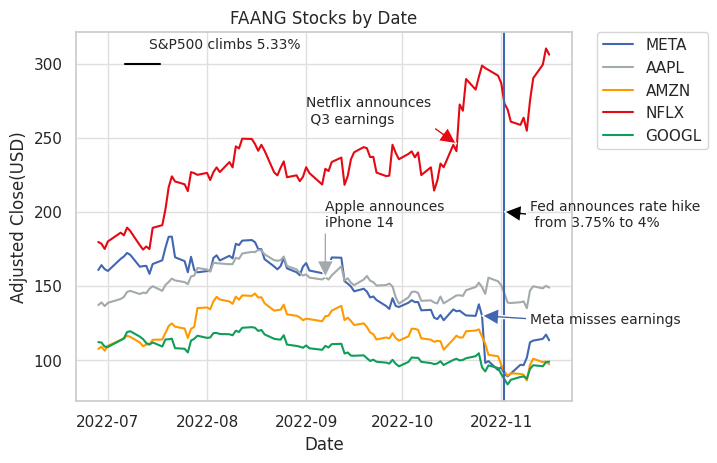

In [21]:
sns.set_theme(style="whitegrid", rc={"grid.color": "#DFDFDF"})
sns.set_palette(palette=["#4267B2", "#A2AAAD",
                "#FF9900", "#E50914", "#0F9D58"])
sns.lineplot(x="date", y="Adjusted Close", data=stocks, hue="Stock Name").set(
    title="FAANG Stocks by Date", ylabel="Adjusted Close(USD)", xlabel="Date")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# Adding events
plt.axvline(x=pd.to_datetime("2022-11-02"))
plt.axhline(y=300, xmin=.1, xmax=.17, color = "#000000")

plt.annotate("Netflix announces\n Q3 earnings", xy = (pd.to_datetime("2022-10-18"), 245.860000), xytext = (pd.to_datetime("2022-09-01"), 260),
arrowprops=dict(facecolor="#E50914", width=2), fontsize="small")
plt.annotate("Apple announces \niPhone 14", xy=(pd.to_datetime("2022-09-07"), 155.701211), xytext=(pd.to_datetime("2022-09-07"), 190),
arrowprops=dict(facecolor="#A2AAAD", width=2), fontsize="small")
plt.annotate("Meta misses earnings", xy=(pd.to_datetime("2022-10-26"), 129.820000), xytext=(pd.to_datetime("2022-11-10"), 125),
arrowprops=dict(facecolor="#4267B2", width=2), fontsize="small")
plt.annotate("Fed announces rate hike\n from 3.75% to 4%", xy=(pd.to_datetime("2022-11-02"), 200), xytext=((pd.to_datetime("2022-11-10"), 190)),
arrowprops=dict(facecolor="#000000", width=2), fontsize="small")
plt.annotate("S&P500 climbs 5.33%", xy = (pd.to_datetime("2022-07-14"),300), xytext = (pd.to_datetime("2022-07-14"),310), fontsize="small")
plt.savefig("../stat386-projects/assets/images/FAANG_lineplot_FINAL.jpg", bbox_inches = "tight")